In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import norm
import pandas as pd

# Neural Networks: List3 - Problem 3

In [13]:
cov_matrix_A = np.random.random(size=(2,2))
cov_matrix_A[0, 0] *= 3
cov_matrix_A[1, 1] *= 3
cov_matrix_A[0, 1] = cov_matrix_A[0, 0] * cov_matrix_A[1, 1] * cov_matrix_A[0, 1]
cov_matrix_A[1, 0] = cov_matrix_A[0, 1]
cov_matrix_A

array([[ 2.75377243,  2.85056397],
       [ 2.85056397,  1.60907531]])

In [14]:
cov_matrix_B = np.random.random(size=(2,2))
cov_matrix_B[0, 0] *= 3
cov_matrix_B[1, 1] *= 3
cov_matrix_B[0, 1] = cov_matrix_B[0, 0] * cov_matrix_B[1, 1] * cov_matrix_B[0, 1]
cov_matrix_B[1, 0] = cov_matrix_B[0, 1]
cov_matrix_B

array([[ 1.78686297,  1.29118999],
       [ 1.29118999,  1.36441414]])

In [15]:
expecatation_value1 = np.random.random(size=(2,))*5-1
expecatation_value2 = np.random.random(size=(2,))*5-1

In [16]:
samples_number = 100
set1 = np.random.multivariate_normal(size=samples_number, mean=expecatation_value1, cov=cov_matrix_A)
set2 = np.random.multivariate_normal(size=samples_number, mean=expecatation_value2, cov=cov_matrix_B)

/home/raroog/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  


In [17]:
def plot_dists_with_elipses(A, B, n=1, line=None):
  def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]
  df_A = pd.DataFrame(A, columns=['x1', 'x2'])
  df_B = pd.DataFrame(B, columns=['x1', 'x2'])
  
  eig_values_A, eig_vectors_A = eigsorted(df_A.corr())
  eig_values_B, eig_vectors_B = eigsorted(df_B.corr())
  
  width_A, height_A = 2 * n * np.sqrt(eig_values_A)
  width_B, height_B = 2 * n * np.sqrt(eig_values_B)
  
  theta_A = np.degrees(np.arctan2(*eig_vectors_A[:,0][::-1]))
  theta_B = np.degrees(np.arctan2(*eig_vectors_B[:,0][::-1]))
  
  e1 = patches.Ellipse(df_A.mean(), width_A, height_A, linewidth=2, fill=False, angle=theta_A, color='orange')
  e2 = patches.Ellipse(df_B.mean(), width_B, height_B, linewidth=2, fill=False, angle=theta_B, color='blue')
  
  plt.scatter(x=set1[:,0], y=set1[:,1], marker='+', color='xkcd:goldenrod', label='Set 1')
  plt.scatter(x=set2[:,0], y=set2[:,1], marker='x', color='xkcd:sky blue', label='Set 2')
  
  if not (line is None):
    xp = np.arange(-4,6, 0.01)
    plt.plot(xp, line(xp))
  
  plt.xlabel(r'$x_1$')
  plt.ylabel(r'$x_2$')
  plt.title(r'Normal distributions with $1-\sigma$ confidence elipses')
  plt.legend()
  
  ax = plt.gca()
  ax.add_artist(e1)
  ax.add_artist(e2)
  plt.show()

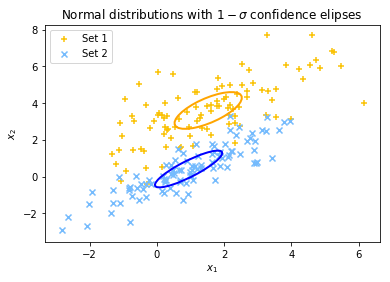

In [18]:
plot_dists_with_elipses(set1, set2)

In [19]:
def scalar_RMSE(X, Y, estimator):
  loss = 0
  for i in range(X.shape[0]):
    loss += 0.5 * np.abs(estimator(X[i]) - Y[i])**2
  return loss

In [44]:
def sigmoid(x):
  return np.power(1+np.exp(-x),-1)

In [45]:
def scalar_RMSE_derivative(x, y, estimator):
  disc = estimator(x)
  loss = np.abs(disc - y) * disc * (1 - disc)
  return loss

In [46]:
class sigmoid_discriminant:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias
    
  def predict(self, x):
    return sigmoid(self.__weights @ x + self.__bias)
  
  @property
  def weights(self):
    return np.copy(self.__weights)
  
  @weights.setter
  def weights(self, weights):
    self.__weights = weights
  
  @property
  def bias(self):
    return np.copy(self.__bias)
  
  @bias.setter
  def bias(self, bias):
    self.__bias = bias

In [53]:
def train_sigmoid_discriminant(train_set, labels, epochs, learning_rate):
  weights = np.random.random((2,))
  bias = np.random.random()
  disc = sigmoid_discriminant(weights, bias)
  for i in range(epochs):
    weights_change = np.zeros((2,))
    bias_change = np.zeros((1,))
    for j in range(train_set.shape[0]):
      loss_der = scalar_RMSE_derivative(train_set[j], labels[j], disc.predict)
      weights_change += loss_der * train_set[j]
      bias_change += loss_der
    disc.weights = weights_change -learning_rate * weights_change
    disc.bias = disc.bias -learning_rate * bias_change
  return disc

In [54]:
trainset = np.concatenate((set1, set2))
targets = np.concatenate((np.zeros((samples_number,)), np.ones((samples_number,))))

In [55]:
disc = train_sigmoid_discriminant(trainset, targets, 10, 0.1)

In [ ]:
plt.plot(np.arange())

In [58]:
np.apply_along_axis(func1d=disc.predict,arr=trainset,axis=1)

array([[  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  4.24112598e-01],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
 